C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\modules\loss.py:608: UserWarning: Using a target size (torch.Size([100, 1])) that is different to the input size (torch.Size([100])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [100/1000], Loss: inf
Epoch [200/1000], Loss: nan
Epoch [300/1000], Loss: nan
Epoch [400/1000], Loss: nan
Epoch [500/1000], Loss: nan
Epoch [600/1000], Loss: nan
Epoch [700/1000], Loss: nan
Epoch [800/1000], Loss: nan
Epoch [900/1000], Loss: nan
Epoch [1000/1000], Loss: nan


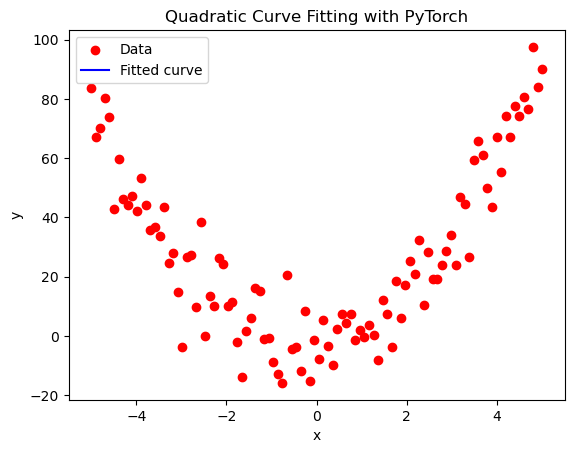

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)
torch.manual_seed(0)
x = np.linspace(-5, 5, 100)
y = 3 * x**2 + 2 * x + 1 + np.random.normal(0, 10, x.shape) 
x_tensor = torch.tensor(x, dtype=torch.float32).view(-1, 1)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)
class QuadraticModel(nn.Module):
    def __init__(self):
        super(QuadraticModel, self).__init__()

        self.linear = nn.Linear(1, 3)

    def forward(self, x):
        # 计算二次曲线y = ax^2 + bx + c
        # 首先计算x的平方
        x_squared = x ** 2
        # 将x和x的平方拼接起来作为输入到线性层
        input_features = torch.cat([x, x_squared], dim=1)
        # 线性层输出a, b, c三个系数
        a, b, c = self.linear(input_features).squeeze(1)  # 去除批次维度和特征维度
        return a * x_squared + b * x + c

# 注意：上面的forward方法有一个问题，因为它在计算x_squared时使用了原始的x值，
# 而不是批次处理后的x值。但由于我们只有一个批次，这里可以简化处理。
# 在更一般的情况下，你应该在forward方法内部处理x的平方，而不是在外部。
# 为了保持代码的简单性，并且因为我们知道只有一个批次，我将保留这种写法，
# 但在实际应用中，你应该确保forward方法能够处理任意批次的输入。

# 为了修正这个问题，我们可以稍微修改forward方法，如下所示：
class QuadraticModelCorrected(nn.Module):
    def __init__(self):
        super(QuadraticModelCorrected, self).__init__()
        self.linear = nn.Linear(2, 1)  # 输入维度为2（x和x^2），输出维度为1（y的预测值）

    def forward(self, x):
        # 计算x的平方
        x_squared = x ** 2
        # 将x和x的平方作为特征拼接起来
        features = torch.cat([x, x_squared], dim=1)
        # 通过线性层得到预测值
        y_pred = self.linear(features).squeeze(1)  # 去除输出维度中的1（如果有的话）
        return y_pred

# 使用修正后的模型类
model = QuadraticModelCorrected()

# 定义损失函数和优化器
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# 训练模型
num_epochs = 1000
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(x_tensor)
    loss = criterion(outputs, y_tensor)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# 使用训练好的模型进行预测
model.eval()
with torch.no_grad():
    predicted = model(x_tensor).detach().numpy()

# 绘制结果
plt.scatter(x, y, label='Data', color='red')
plt.plot(x, predicted, label='Fitted curve', color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Quadratic Curve Fitting with PyTorch')
plt.show()